<a href="https://colab.research.google.com/github/cmpm09/Practicando-Python-para-Data-Science-Challenge-1-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [7]:
ingresos_tiendas={}

def Ingresos(variable, numero_tienda):
  ingresos = variable["Precio"].sum()

  ingresos_tiendas[numero_tienda]=ingresos
  print("\n{}:".format(numero_tienda))
  print("Ingresos totales: ${}".format(ingresos))

Ingresos(tienda,"Tienda 1")
Ingresos(tienda2,"Tienda 2")
Ingresos(tienda3,"Tienda 3")
Ingresos(tienda4,"Tienda 4")

ingresos_tiendas


Tienda 1:
Ingresos totales: $1150880400.0

Tienda 2:
Ingresos totales: $1116343500.0

Tienda 3:
Ingresos totales: $1098019600.0

Tienda 4:
Ingresos totales: $1038375700.0


{'Tienda 1': np.float64(1150880400.0),
 'Tienda 2': np.float64(1116343500.0),
 'Tienda 3': np.float64(1098019600.0),
 'Tienda 4': np.float64(1038375700.0)}

Gráfico

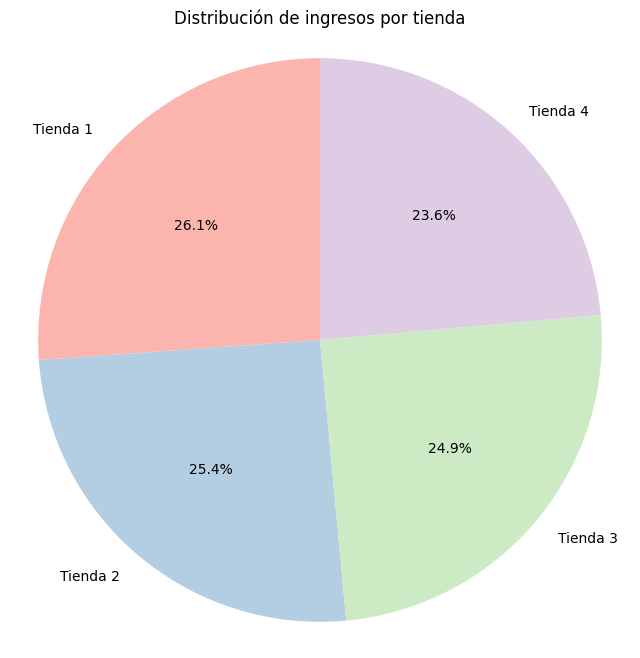

In [11]:
import matplotlib.pyplot as plt

nombres = list(ingresos_tiendas.keys())
valores = list(ingresos_tiendas.values())


plt.figure(figsize=(8, 8))
plt.pie(valores, labels=nombres, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("Distribución de ingresos por tienda")
plt.axis('equal')
plt.show()

# 2. Ventas por categoría

In [12]:
ventas_categorias_1 = tienda.groupby("Categoría del Producto")["Precio"].count()
ventas_categorias_2 = tienda2.groupby("Categoría del Producto")["Precio"].count()
ventas_categorias_3 = tienda3.groupby("Categoría del Producto")["Precio"].count()
ventas_categorias_4 = tienda4.groupby("Categoría del Producto")["Precio"].count()


print("Tienda 1:\n{}".format(ventas_categorias_1.sort_values(ascending=False)))
print("\nTienda 2:\n{}".format(ventas_categorias_2.sort_values(ascending=False)))
print("\nTienda 3:\n{}".format(ventas_categorias_3.sort_values(ascending=False)))
print("\nTienda 4:\n{}".format(ventas_categorias_4.sort_values(ascending=False)))

Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: Precio, dtype: int64

Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: Precio, dtype: int64

Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
Name: Precio, dtype: int64

Tienda 4:
Categoría del Producto
Muebles                    480
Electróni

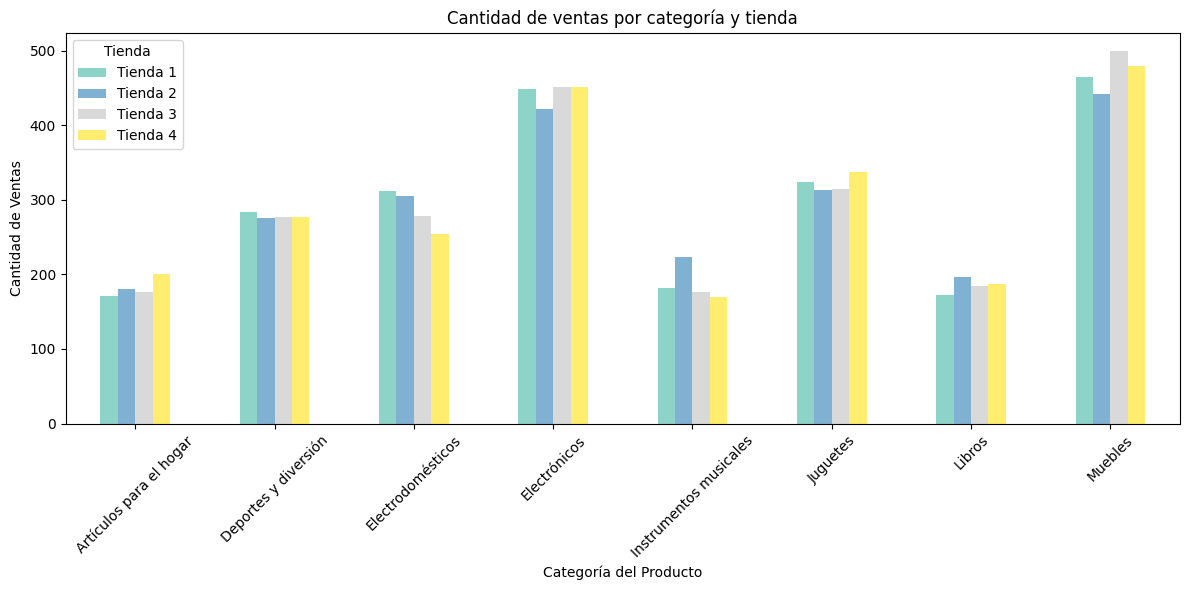

In [13]:
categorias = ventas_categorias_1.index

todas_categorias = pd.DataFrame({
    "Tienda 1": ventas_categorias_1,
    "Tienda 2": ventas_categorias_2,
    "Tienda 3": ventas_categorias_3,
    "Tienda 4": ventas_categorias_4,
})

todas_categorias.plot(kind="bar", figsize=(12, 6), colormap="Set3")
plt.title("Cantidad de ventas por categoría y tienda")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad de Ventas")
plt.xticks(rotation=45)
plt.legend(title="Tienda")
plt.tight_layout()

# 3. Calificación promedio de la tienda


In [14]:
promedios_satisfaccion={}

def satisfaccion(variable, numero_tienda):
  promedio = variable["Calificación"].mean()
  promedios_satisfaccion[numero_tienda]=promedio

  print("\n{}:".format(numero_tienda))
  print("La satisfacción promedio de los clientes de la tienda {} fue {}".format(numero_tienda, round(promedio,2)))

satisfaccion(tienda,"Tienda 1")
satisfaccion(tienda2,"Tienda 2")
satisfaccion(tienda3,"Tienda 3")
satisfaccion(tienda4,"Tienda 4")

promedios_satisfaccion



Tienda 1:
La satisfacción promedio de los clientes de la tienda Tienda 1 fue 3.98

Tienda 2:
La satisfacción promedio de los clientes de la tienda Tienda 2 fue 4.04

Tienda 3:
La satisfacción promedio de los clientes de la tienda Tienda 3 fue 4.05

Tienda 4:
La satisfacción promedio de los clientes de la tienda Tienda 4 fue 4.0


{'Tienda 1': np.float64(3.976685036032217),
 'Tienda 2': np.float64(4.037303942348453),
 'Tienda 3': np.float64(4.048325561678677),
 'Tienda 4': np.float64(3.9957591178965224)}

Gráfico

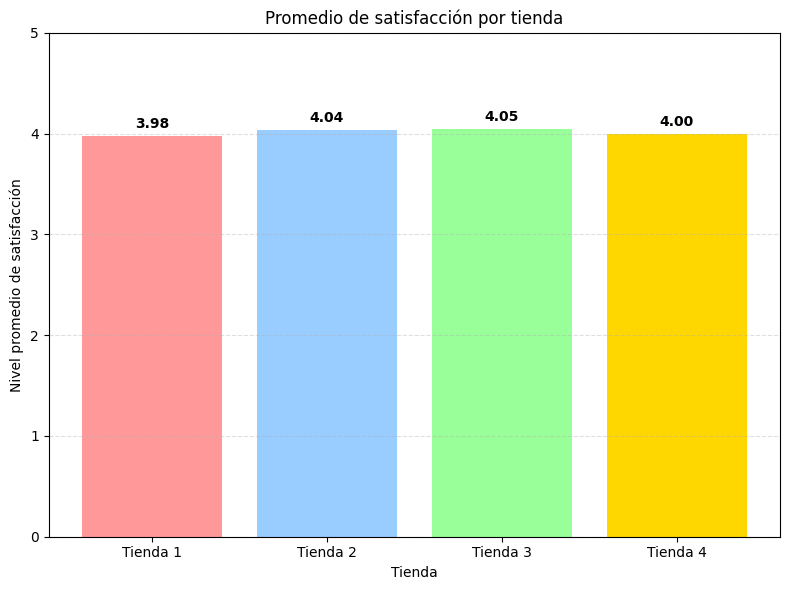

In [15]:
import matplotlib.pyplot as plt

tiendas = list(promedios_satisfaccion.keys())
promedios = list(promedios_satisfaccion.values())

colores = ["#FF9999", "#99CCFF", "#99FF99", "#FFD700"]

plt.figure(figsize=(8, 6))
barras = plt.bar(tiendas, promedios, color=colores)

for barra, valor in zip(barras, promedios):
    plt.text(barra.get_x() + barra.get_width()/2, valor + 0.05, f"{valor:.2f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Promedio de satisfacción por tienda")
plt.xlabel("Tienda")
plt.ylabel("Nivel promedio de satisfacción")
plt.ylim(0, 5)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [22]:
def mas_menos_vendidos(variable, numero_tienda):
  productos = variable.groupby("Producto")["Precio"].count()
  mas_vendidos = productos.sort_values(ascending=False).head(5)
  menos_vendidos = productos.sort_values(ascending=True).head(5)

  print("\n{}:".format(numero_tienda))
  print("Productos más vendidos:")
  print(mas_vendidos)
  print("\nProductos menos vendidos:")
  print(menos_vendidos)

mas_menos_vendidos(tienda,"Tienda 1")
mas_menos_vendidos(tienda2,"Tienda 2")
mas_menos_vendidos(tienda3,"Tienda 3")
mas_menos_vendidos(tienda4,"Tienda 4")


Tienda 1:
Productos más vendidos:
Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
Name: Precio, dtype: int64

Productos menos vendidos:
Producto
Auriculares con micrófono      33
Celular ABXY                   33
Olla de presión                35
Pandereta                      36
Ciencia de datos con Python    39
Name: Precio, dtype: int64

Tienda 2:
Productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
Name: Precio, dtype: int64

Productos menos vendidos:
Producto
Juego de mesa      32
Impresora          34
Mesa de comedor    34
Sillón             35
Auriculares        37
Name: Precio, dtype: int64

Tienda 3:
Productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: Precio, dtype: in

# 5. Envío promedio por tienda

In [23]:
promedios_envio={}

def promedio_envio(variable, numero_tienda):
  envio = variable["Costo de envío"].mean()
  promedios_envio[numero_tienda]=envio

  print("\n{}:".format(numero_tienda))
  print("En promedio se gasta en el envío ${}".format(round(envio,2)))

promedio_envio(tienda,"Tienda 1")
promedio_envio(tienda2,"Tienda 2")
promedio_envio(tienda3,"Tienda 3")
promedio_envio(tienda4,"Tienda 4")
promedios_envio



Tienda 1:
En promedio se gasta en el envío $26018.61

Tienda 2:
En promedio se gasta en el envío $25216.24

Tienda 3:
En promedio se gasta en el envío $24805.68

Tienda 4:
En promedio se gasta en el envío $23459.46


{'Tienda 1': np.float64(26018.60958033065),
 'Tienda 2': np.float64(25216.235693090293),
 'Tienda 3': np.float64(24805.680373039424),
 'Tienda 4': np.float64(23459.457167090754)}

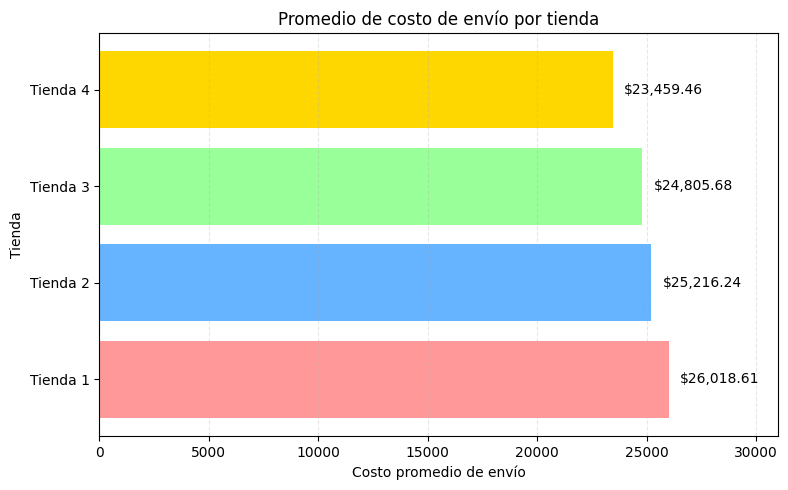

In [21]:
import matplotlib.pyplot as plt

nombres = list(promedios_envio.keys())
valores = list(promedios_envio.values())

colores = ["#FF9999", "#66B3FF", "#99FF99", "#FFD700"]

plt.figure(figsize=(8, 5))
barras = plt.barh(nombres, valores, color=colores)

for i, valor in enumerate(valores):
    plt.text(valor + 500, i, f"${valor:,.2f}", va="center", fontsize=10)

plt.title("Promedio de costo de envío por tienda")
plt.xlabel("Costo promedio de envío")
plt.ylabel("Tienda")
plt.xlim(0, max(valores) + 5000)
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

#**Informe final**

##Introducción
El presente informe tiene como objetivo analizar el desempeño de las cuatro tiendas que conforman la cadena Alura Store, con el fin de identificar cuál de ellas representa la menor eficiencia operativa y comercial, y así tomar una decisión informada sobre cuál debería ser vendida para dar paso a un nuevo emprendimiento.

Para ello, se ha realizado un análisis exhaustivo basado en diversos indicadores clave, tales como los ingresos totales por tienda, las categorías de productos más y menos vendidos, las preferencias de compra de los clientes, las calificaciones de satisfacción, el comportamiento de los productos más populares y menos solicitados, así como los costos promedio de envío.

A través de este análisis comparativo se busca no solo determinar cuál tienda presenta el menor rendimiento, sino también comprender el perfil de sus clientes, sus fortalezas y debilidades, y su impacto dentro de la cadena. La conclusión final permitirá tomar una decisión estratégica orientada a optimizar recursos y mejorar la eficiencia general del negocio.


##Análisis
###Ingresos totales de las tiendas.
En cuanto a ingresos no hay una diferencia descomunal entre las tiendas, sin embargo, la tienda 1 se destaca por vender más, abarcando el 26.1% de los ingresos totales, siendo seguida de tienda 2 con el 25.4%, le sigue la tienda 3 con el 24.9% y por último la tienda 4, con un 23.6%. Dejando un rango entre la mayor y la menor de solo 3%.


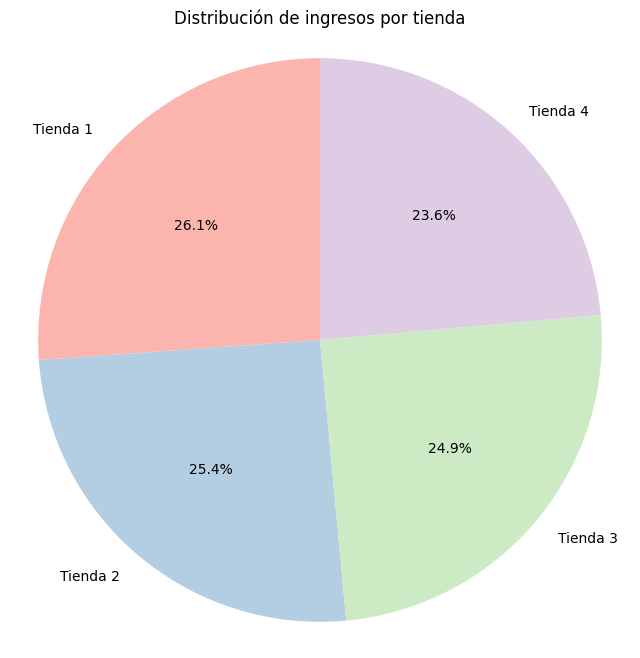

In [16]:
import matplotlib.pyplot as plt

nombres = list(ingresos_tiendas.keys())
valores = list(ingresos_tiendas.values())


plt.figure(figsize=(8, 8))
plt.pie(valores, labels=nombres, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("Distribución de ingresos por tienda")
plt.axis('equal')
plt.show()

###Categorías de productos más y menos vendidas.
En cuanto a las categorías los números se ven muy parejos, por lo que considero pertinente analizar cada categoría de manera individual, las 4 que se destacan de manera ascendente son:
•	Muebles: La tienda que vende más es la tienda 3, y la menos la tienda2.
•	Electrónicos: En esta las tiendas 3 y 4 están en empate en cuestión a ventas, siendo seguidas de cerca por la tienda 1, y dejando nuevamente atrás a la tienda 2.
•	Juguetes: Destaca la tienda 4, dejando atrás a la tiendas 2 y 3, siendo la 2 nuevamente la más baja.
•	Electrodomésticos: De manera peculiar, esta es la única categoría que se ilustra de la misma manera que el orden de las tiendas, siendo la 1 la más importante, y la 4 la menos, siendo para esta última, la única de las tiendas que tienen esta categoría en quinto lugar.
•	Deportes y diversión: Siendo para todas las tiendas el quinto lugar, excepto para la tienda 4, que es el cuarto. La tienda 1 resalta dado que las demás tiendas quedan muy cercas, perdiendo la tienda 2 por muy poco.

A partir de aquí las tiendas difieren mucho en cuestión de prioridad.  
•	Instrumentos musicales: Es la sexta categoría más importante para las tiendas 1 y 2, siendo en esta en la que más se destaca la tienda 2, y dejando en último a la tienda 4.
•	Libros: La penúltima para todas, excepto para la tienda 3, en esta se destaca la tienda 2, dejando a la tienda 1 en último.
•	Artículos para el hogar: la tienda 4 se destaca, mientras que la tienda 1 se queda al último.

Con esto podemos analizar los patrones generales de compra de cada tienda.
**Tienda 1:**
Sus clientes se destacan sobre los demás en la compra de artículos de deportes y diversión, y en electrodomésticos, sin dejar bajas sus necesidades de muebles y electrónicos. Siendo de sus menos necesidades los libros y los artículos para el hogar. Se puede suponer que los clientes de la tienda 1 son personas de buen rango económico que pueden utilizar su dinero en diversión y artículos que aumenten sus comodidades.

**Tienda 2: **
Sus clientes se destacan sobre los demás en la compra de libros e instrumentos musicales, sin dejar atrás sus necesidades en artículos para el hogar y los electrodomésticos. Siendo de su menos agrado los muebles y electrónicos. Con esta información se puede suponer que los clientes de la tienda 2 son de ingresos medios, y con personalidades más creativas, que buscan más pasar un buen rato que comodidades.

**Tienda 3**
Sus clientes se destacan en la compra de muebles y electrónicos, sin descuidar los juguetes, libros y la diversión, sin embargo, esta tienda no destaca en ser la menos en ninguna categoría, por lo que se puede suponer que sus clientes son muy diversos y de diferentes niveles de ingresos.

**Tienda 4**
Sus clientes destacan en la compra de artículos para el hogar, los juguetes y los electrónicos, sin dejar atrás los muebles y libros. Las categorías de su menos agrado son los electrodomésticos e instrumentos musicales. Esta información nos ayuda a suponer que los clientes de la tienda 4 son principalmente familias con niños pequeños, que sus ingresos puede que sean altos, pero que tienen sus prioridades definidas.


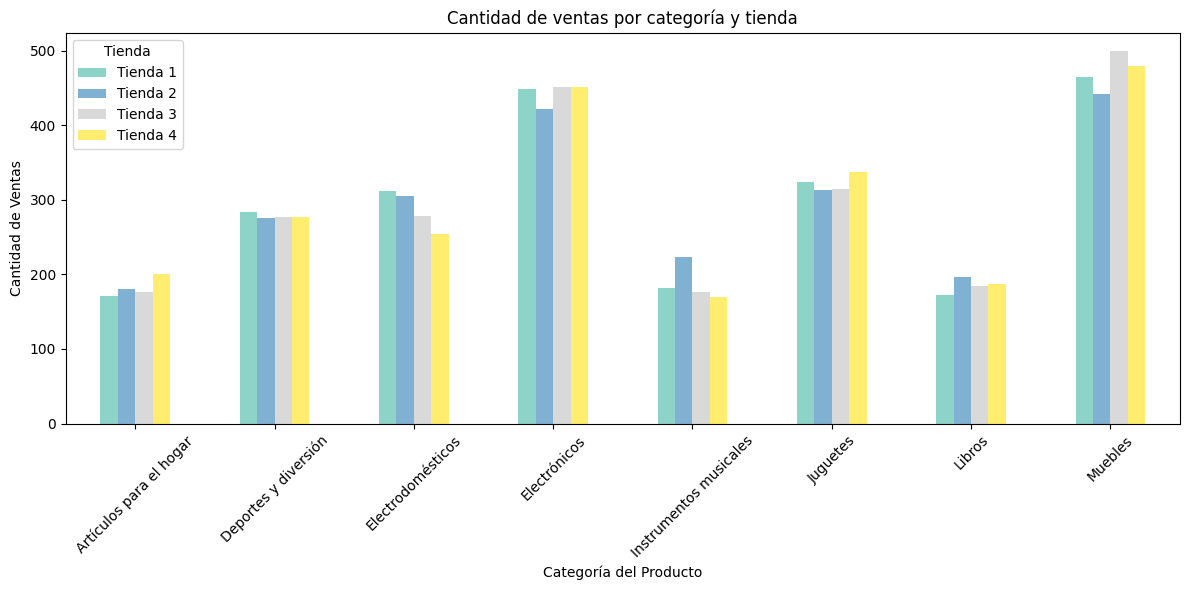

In [17]:
categorias = ventas_categorias_1.index

todas_categorias = pd.DataFrame({
    "Tienda 1": ventas_categorias_1,
    "Tienda 2": ventas_categorias_2,
    "Tienda 3": ventas_categorias_3,
    "Tienda 4": ventas_categorias_4,
})

todas_categorias.plot(kind="bar", figsize=(12, 6), colormap="Set3")
plt.title("Cantidad de ventas por categoría y tienda")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad de Ventas")
plt.xticks(rotation=45)
plt.legend(title="Tienda")
plt.tight_layout()

###Calificaciones promedio de los clientes por tienda.
La tienda con mejor promedio de satisfacción de los clientes es la tienda 3 con 4.05, siendo seguida por la tienda 2 con 4.04, la tienda 4 con 4, y por último la tienda 1 con 3.98.


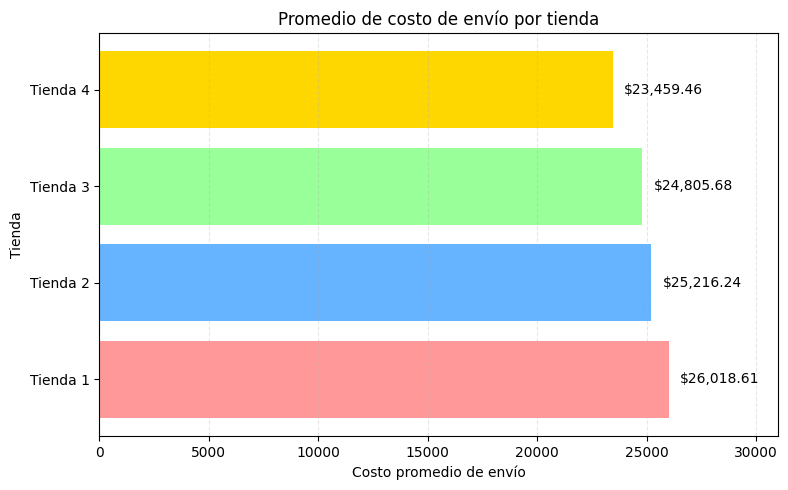

In [24]:
import matplotlib.pyplot as plt

nombres = list(promedios_envio.keys())
valores = list(promedios_envio.values())

colores = ["#FF9999", "#66B3FF", "#99FF99", "#FFD700"]

plt.figure(figsize=(8, 5))
barras = plt.barh(nombres, valores, color=colores)

for i, valor in enumerate(valores):
    plt.text(valor + 500, i, f"${valor:,.2f}", va="center", fontsize=10)

plt.title("Promedio de costo de envío por tienda")
plt.xlabel("Costo promedio de envío")
plt.ylabel("Tienda")
plt.xlim(0, max(valores) + 5000)
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

###Productos más y menos vendidos.
**Tienda 1:**
Los productos más vendidos incluyen una mezcla equilibrada entre muebles y electrodomésticos. Armarios, TV LED UHD 4K y Microondas lideran con 60 unidades cada uno, lo cual indica una alta demanda por productos funcionales para el hogar.

Por otro lado, los productos menos vendidos, como Auriculares con micrófono y Celulares ABXY, muestran una menor rotación, posiblemente por menor interés en tecnología personal en esta tienda específica.

**Tienda 2: **
Destacan productos de tecnología educativa y de uso cotidiano. El libro Iniciando en programación fue el más vendido (65 unidades), lo que sugiere un fuerte interés por el aprendizaje tecnológico. También se destacan Microondas y Baterías.

En contraste, productos como Juegos de mesa e Impresoras tuvieron menos ventas, lo cual podría reflejar una menor orientación recreativa o de oficina en el perfil de los compradores.

**Tienda 3:**
En esta tienda predominaron las ventas de mobiliario, como Kit de bancas, Mesa de comedor y Cama king, todas con más de 55 unidades. Esto puede señalar que esta tienda se especializa o destaca en productos para el hogar.

Entre los menos vendidos aparecen objetos de menor valor unitario o enfocados en ocio, como Bloques de construcción y Mochilas, lo que sugiere una preferencia del público por compras más sustanciales.

**Tienda 4: **
Las ventas se centraron en productos de descanso y hogar, como Cama box, Cubertería y Cama king, reafirmando una tendencia hacia el confort y equipamiento doméstico.

Por otro lado, artículos como Guitarras eléctricas y Ciencia de datos con Python tuvieron menor movimiento, indicando un interés más bajo en artículos especializados o de nicho.


###Coste de envío promedio para cada tienda.
En cuanto al costo de envío, el más caro en promedio fue de la tienda 1, con $$26,018.61, siendo seguido por la tienda 2 con $25,216.24, luego la tienda 3 con $24,8.5.68 y por último y la más barata resulta ser la tienda 4 con $24805.68


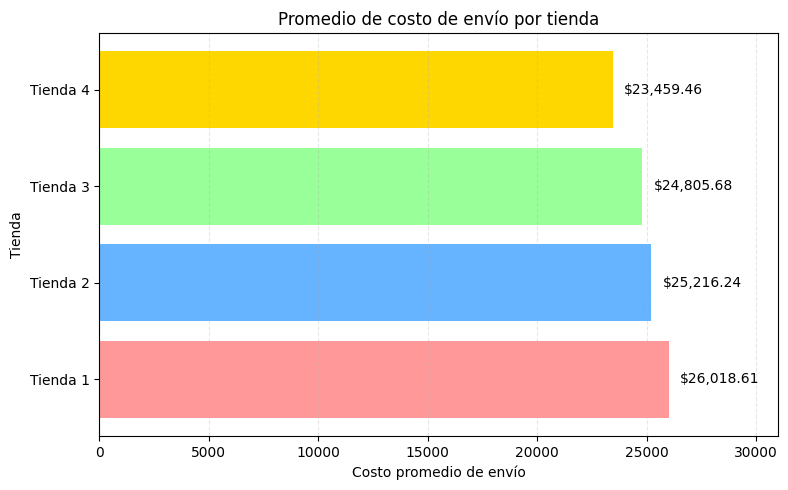

In [25]:
import matplotlib.pyplot as plt

nombres = list(promedios_envio.keys())
valores = list(promedios_envio.values())

colores = ["#FF9999", "#66B3FF", "#99FF99", "#FFD700"]

plt.figure(figsize=(8, 5))
barras = plt.barh(nombres, valores, color=colores)

for i, valor in enumerate(valores):
    plt.text(valor + 500, i, f"${valor:,.2f}", va="center", fontsize=10)

plt.title("Promedio de costo de envío por tienda")
plt.xlabel("Costo promedio de envío")
plt.ylabel("Tienda")
plt.xlim(0, max(valores) + 5000)
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

##Conclusión
Luego de analizar de forma integral los ingresos, categorías de productos vendidos, preferencias de los clientes, niveles de satisfacción, productos más y menos vendidos, así como los costos de envío, se puede concluir que la tienda menos eficiente dentro de la cadena Alura Store es la **Tienda 4**, por lo que sería la candidata más adecuada para ser vendida y así liberar recursos para un nuevo emprendimiento.

Aunque la **Tienda 4 **presenta fortalezas como una especialización en artículos para el hogar y juguetes —productos típicamente demandados por familias— y posee el costo de envío promedio más bajo, también exhibe debilidades relevantes en comparación con las demás tiendas. Sus ingresos totales son los más bajos del grupo (23.6%), su calificación promedio de satisfacción del cliente no se destaca frente a las demás, y tiene bajo desempeño en categorías clave como electrodomésticos e instrumentos musicales. Además, entre sus productos menos vendidos figuran artículos de alto valor o especializados, lo que puede limitar su potencial de crecimiento.

En contraste, otras tiendas muestran perfiles más equilibrados, mayor diversificación, o mejor percepción por parte de los clientes, como es el caso de la Tienda 3, que se posiciona como la más eficiente por su alta satisfacción del cliente, variedad en categorías con buen rendimiento, y una base de consumidores diversa.

Por lo tanto, se recomienda la venta de la Tienda 4 como estrategia para optimizar recursos y permitir el inicio de un nuevo proyecto que pueda generar mayor valor para la cadena.
